# **금융데이터 수집**

## **1. 주가 데이터 수집**

### **1-1. Pykrx**


In [7]:
#Pykrx 설치

!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 15.9 MB/s 
     |████████████████████████████████| 52 kB 990 kB/s 
     |████████████████████████████████| 254 kB 64.3 MB/s 


In [8]:
import pandas as pd
import numpy as np

from pykrx import stock
from pykrx import bond

In [9]:
#get_index_ticker_list()를 이용하여 모든 지수의 티커 조회
for ticker in stock.get_index_ticker_list()[:5]:
    tickerName = stock.get_index_ticker_name(ticker)
    print(ticker, tickerName)

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품


In [10]:
#투자자별 거래실적 일별추이 수집
tradingresult = stock.get_market_trading_value_by_date("20220101","20221021","005930")
print(tradingresult.head())

                    기관합계        기타법인            개인         외국인합계  전체
날짜                                                                  
2022-01-03 -329791819300  4774451400  184943470500  140073897400   0
2022-01-04 -206326913300  1908886100   91958901300  112459125900   0
2022-01-05 -598003977100 -8062754100  649419857800  -43353126600   0
2022-01-06 -171750680700  3976748900   -3254631500  171028563300   0
2022-01-07 -165044032600 -3880739900 -171571901600  340496674100   0


In [11]:
#특정 종목의 지정된 기간 OHLCV 조회
kospi = stock.get_index_ohlcv("20200101", "20221021", "1001")
kospi[:10]

#시가, 고가, 저가, 종가의 상관관계는 "캔들스틱"의 모양을 결정

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2020-01-02,2201.21,2202.32,2171.84,2175.17,494677752,4638167309579,1461424793589993
2020-01-03,2192.58,2203.38,2165.39,2176.46,631562785,5763662746548,1462298971774498
2020-01-06,2154.97,2164.42,2149.95,2155.07,592670719,5156540935534,1448385085188395
2020-01-07,2166.60,2181.62,2164.27,2175.54,568235609,5143511908278,1462298814406954
2020-01-08,2156.27,2162.32,2137.72,2151.31,913830628,8750722208310,1446631314388659
2020-01-09,2182.20,2186.45,2172.16,2186.45,592603655,7261591245997,1470805018622162
2020-01-10,2189.48,2206.92,2188.10,2206.39,594536948,6459299778577,1484063380523097
2020-01-13,2204.49,2230.43,2204.49,2229.26,488288759,6214780461727,1499967180669582
2020-01-14,2243.06,2250.79,2232.94,2238.88,835899254,7294227861325,1506534496285997


### **1-2.FinanceDataReader**

In [41]:
pip install finance_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 48%|████▊     | 2220/4610 [00:41<00:23, 100.57it/s]

In [42]:
import FinanceDataReader as fdr

In [43]:
#DataReader(symbol, start, end, exchange, data_source) 함수를 사용하여 다양한 거래소(wikipedia·FRED·Investing·krx·nasdaq) 또는 데이터로부터 가격 데이터를 수집

APPLE = fdr.DataReader('AAPL','2022')
APPLE.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,181.259918,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.959442,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,174.199158,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.291183,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.460495,86709100


In [44]:
KOSPI_INDEX = fdr.DataReader('KS11', '2020-01-01')
KOSPI_INDEX.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,2175.169922,494700
2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,2176.459961,631600
2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,2155.070068,592700
2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,2175.540039,568200
2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,2151.310059,913800


In [45]:
#market = 'KRX'-KRX 종목 전체, 'KOSPI'-KOSPI 종목, 'KOSDAQ'-KOSDAQ 종목, 'KONEX'-KONEX 종목, 'NASDAQ'-나스닥 종목, 'NYSE'-뉴욕증권거래소 종목, 'SP500'-S&P500 종목
#위에서 언급된 각각의 인자를 넣어 확인할 수 있다.

#나스닥 종목 수집
stocks = fdr.StockListing('NASDAQ')
stocks.head(5)


100%|██████████| 4610/4610 [00:50<00:00, 91.47it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010


In [46]:
# 상장폐지 종목 전체 리스트
krx_delisting = fdr.StockListing('KRX-DELISTING')
print(krx_delisting.head(2))

# 관리종목 리스트
krx_adm = fdr.StockListing('KRX-ADMINISTRATIVE')
print(krx_adm.head(2))

     Symbol     Name  Market SecuGroup Kind ListingDate DelistingDate Reason  \
0  06031012     3S R  KOSDAQ   신주인수권증서  보통주  2012-05-14    2012-05-21          
1  00684014  AK홀딩스8R   KOSPI   신주인수권증서  보통주  2014-07-28    2014-08-04          

  ArrantEnforceDate ArrantEndDate Industry  ParValue  ListingShares ToSymbol  \
0               NaT           NaT                0.0      1194422.0            
1               NaT           NaT                0.0      1278299.0            

  ToName  
0         
1         
   Symbol  Name DesignationDate                   Reason
0  003620   쌍용차      2021-04-16  반기검토의견 의견거절,회생절차개시신청,기타
1  007610  선도전기      2022-08-17           기타,반기검토의견 의견거절


In [47]:
#캔들차트 그리기

#삼성전자 캔들차트
df = fdr.DataReader('005930', '2021-01-01', '2021-02-15')

fdr.chart.plot(df)

### **1-3. yfinance**

In [48]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import yfinance as yf

In [50]:
#Ticker(TickerBase)로 항목을 받아올 수 있다

tesla = yf.Ticker("TSLA")
tesla_info = tesla.info

In [51]:
teslaInfoStr = ""
i=0
while (i < len(tesla_info['longBusinessSummary'])):
  if(i%100 == 0):
    teslaInfoStr += "\n"
  teslaInfoStr += tesla_info['longBusinessSummary'][i]
  i += 1

print(teslaInfoStr)
print("")
print("")
print(tesla.financials)       #재무제표
print(tesla.major_holders)    #주주정보


Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generat
ion and storage systems in the United States, China, and internationally. The company operates in tw
o segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric ve
hicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicle
s through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and 
purchase financing and leasing services. This segment is also involved in the provision of non-warra
nty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, 
as well as sale of products to third party customers; services for electric vehicles through its com
pany-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties a
nd extended service plans. The Energy Generation and Storage segment engages in the design

In [52]:
#애플과 아마존의 주가 비교

data = yf.download("AMZN AAPL", start="2022-01-01", end="2022-09-30")
data.head(3)

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        AMZN        AAPL        AMZN        AAPL   
Date                                                                     
2022-01-03  181.259918  170.404495  182.009995  170.404495  182.880005   
2022-01-04  178.959457  167.522003  179.699997  167.522003  182.940002   
2022-01-05  174.199158  164.356995  174.919998  164.356995  180.169998   

                               Low                    Open              \
                  AMZN        AAPL        AMZN        AAPL        AMZN   
Date                                                                     
2022-01-03  170.703506  177.710007  166.160507  177.830002  167.550003   
2022-01-04  171.399994  179.119995  166.349503  182.630005  170.438004   
2022-01-05  167.126495  174.639999  164.356995  179.610001  166.882996   

               Volume            
                 AAPL      AMZN  
Date                             
2022-01-03  104487900  63520000  
2022-01-04   99310400  70726000  
2022-01-05   94537600  64302000

## **2. 거시경제 데이터 수집**

### **2-1. Ecos API**

In [25]:
import datetime                     
import requests
import pandas as pd
from bs4 import BeautifulSoup

#한국은행 ECOS API를 사용하기 위해서는 개인 인증키 발급을 받아야 한다
#발급을 받으면 아래 private_api_key = "본인의 API키 입력하기" 위치에 개인키를 넣고, 각종 거시경제 데이터를 수집 할 수 있다
#https://ecos.bok.or.kr/api/#/

private_api_key = #"개인 API 입력"

# ECOS 에서 데이터를 호출하는 함수를 만든다
def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/%s/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(private_api_key, Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)
    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')

    # Pandas 데이터프레임으로 전환한다
    raw_data = xml.find_all("row")
    date_list = []
    value_list = []

    for item in raw_data:
        value = item.find('DATA_VALUE').text.encode('utf-8')
        date_str = item.find('TIME').text
        value = float(value)
        date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
        value_list.append(value)

    df = pd.DataFrame(index = date_list)
    df['value'] = value_list

    return df

In [26]:
금리 = EcosDownload('722Y001', 'M', '202202', '202206', '0101000','','')
금리.head()

,value
2022-02-01,1.25
2022-03-01,1.25
2022-04-01,1.50
2022-05-01,1.75
2022-06-01,1.75


In [27]:
소비자물가지수 = EcosDownload('901Y009', 'M', '202111', '202206', '0', '', '')
소비자물가지수.head()

,value
2021-11-01,103.87
2021-12-01,104.04
2022-01-01,104.69
2022-02-01,105.30
2022-03-01,106.06


In [28]:
부동산가격지수 = EcosDownload('901Y064', 'M', '202111', '202206', 'P65B','','')
부동산가격지수.head()

,value
2021-11-01,0.429
2021-12-01,0.418
2022-01-01,0.368
2022-02-01,0.347
2022-03-01,0.359


## **3. 기업 공시데이터 수집**

### **3-1. Dart API**

In [30]:
pip install opendartreader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
 # api_key : Dart에서 발급받은 API KEY
 # corp_code : 기업 고유번호
 # year : 보고서 기준년도
 # reprt_code : 11013(1분기), 11012(반기), 11014(3분기), 11011(사업)

In [32]:
import OpenDartReader

# 객체 생성 (API KEY 지정) 
# https://opendart.fss.or.kr/
# 접속 후 가입 - 오픈API이용현황에서 개인키 확인 

api_key = # '개인키 입력'
dart = OpenDartReader(api_key) 


In [33]:
# 공시정보 
# 특정기업(삼성전자) 상장이후 모든 공시 목록 (5,600 건+)
dart.list('삼성전자') # 기업이름 혹은

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000053,김윤수,20221024,
1,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000036,김윤수,20221024,
2,00126380,삼성전자,005930,Y,주식등의대량보유상황보고서(일반),20221021000405,삼성물산,20221021,
3,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000007,이동하,20221018,
4,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000004,박훈철,20221018,
...,...,...,...,...,...,...,...,...,...
5625,00126380,삼성전자,005930,Y,채무보증(담보제공포함),20000404000429,삼성전자,20000404,
5626,00126380,삼성전자,005930,Y,최대주주등을위한금전의대여,20000401000031,삼성전자,20000401,
5627,00126380,삼성전자,005930,Y,감사보고서 (1999.12),20000320000124,삼일회계법인,20000320,
5628,00126380,삼성전자,005930,Y,[기재정정]반기보고서 (1999.06),19990824000003,삼성전자,19990824,


In [34]:
dart.list('005930') # 종목코드를 사용할 수 있음

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000053,김윤수,20221024,
1,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000036,김윤수,20221024,
2,00126380,삼성전자,005930,Y,주식등의대량보유상황보고서(일반),20221021000405,삼성물산,20221021,
3,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000007,이동하,20221018,
4,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000004,박훈철,20221018,
...,...,...,...,...,...,...,...,...,...
5625,00126380,삼성전자,005930,Y,채무보증(담보제공포함),20000404000429,삼성전자,20000404,
5626,00126380,삼성전자,005930,Y,최대주주등을위한금전의대여,20000401000031,삼성전자,20000401,
5627,00126380,삼성전자,005930,Y,감사보고서 (1999.12),20000320000124,삼일회계법인,20000320,
5628,00126380,삼성전자,005930,Y,[기재정정]반기보고서 (1999.06),19990824000003,삼성전자,19990824,


In [35]:
# 특정기업(삼성전자) 특정 날짜 이후 공시목록 (날짜에 다양한 포맷이 가능 2022, '2022-01-01', '20220101' )
dart.list('삼성전자', start='2022-01-01') # 2022-01-01 ~ 오늘
dart.list('005930', start='2022-01-01') # 2022-01-01 ~ 오늘

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000053,김윤수,20221024,
1,00126380,삼성전자,005930,Y,[기재정정]임원ㆍ주요주주특정증권등소유상황보고서,20221024000036,김윤수,20221024,
2,00126380,삼성전자,005930,Y,주식등의대량보유상황보고서(일반),20221021000405,삼성물산,20221021,
3,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000007,이동하,20221018,
4,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000004,박훈철,20221018,
...,...,...,...,...,...,...,...,...,...
187,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20220111000233,김용주,20220111,
188,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20220110000025,정진민,20220110,
189,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20220107000644,고정욱,20220107,
190,00126380,삼성전자,005930,Y,기업설명회(IR)개최(안내공시),20220107800039,삼성전자,20220107,유


In [36]:
# 특정기업(삼성전자) 특정 일자 범위(start~end)의 공시목록 (날짜에 다양한 포맷이 가능)
dart.list('005930', start='2022-04-28', end='2022-10-21')


,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,00126380,삼성전자,005930,Y,주식등의대량보유상황보고서(일반),20221021000405,삼성물산,20221021,
1,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000007,이동하,20221018,
2,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221018000004,박훈철,20221018,
3,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20221017000310,박태훈,20221017,
4,00126380,삼성전자,005930,Y,최대주주등소유주식변동신고서,20221011800602,삼성전자,20221011,유
...,...,...,...,...,...,...,...,...,...
119,00126380,삼성전자,005930,Y,특수관계인에대한부동산임대,20220428000697,삼성전자,20220428,공
120,00126380,삼성전자,005930,Y,임원ㆍ주요주주특정증권등소유상황보고서,20220428000592,이정배,20220428,
121,00126380,삼성전자,005930,Y,현금ㆍ현물배당결정,20220428800081,삼성전자,20220428,유
122,00126380,삼성전자,005930,Y,연결재무제표기준영업(잠정)실적(공정공시),20220428800063,삼성전자,20220428,유


In [37]:
# 특정기업(삼성전자) 1999년~이후 모든 정기보고서 (정정된 공시포함)
dart.list('005930', start='1999-01-01', kind='A', final=False)

# 특정기업(삼성전자) 1999년~이후 모든 정기보고서 (최종보고서)
dart.list('005930', start='1999-01-01', kind='A') 

# 2022-07-01 하루동안 모든 기업의 공시목록
dart.list(start='20200701', end='20200701')

# 2022-01-01 ~ 2022-01-10 모든 회사의 모든 공시목록 (3,139 건)
dart.list(start='2022-01-01', end='2022-01-10')

# 2022-01-01 ~ 2022-01-10 모든 회사의 모든 공시목록 (정정된 공시포함) (3,587 건)
dart.list(start='2022-01-01', end='2022-01-10', final=False)

# 2022-01-01~2022-03-30 모든 회사의 정기보고서 (corp를 특정 하지 않으면 최대 3개월) (2,352 건)
dart.list(start='2022-01-01', end='2022-03-30', kind='A')

,corp_code,corp_name,stock_code,corp_cls,report_nm,rcept_no,flr_nm,rcept_dt,rm
0,01309209,더블다운인터액티브,,E,[첨부추가]사업보고서 (2021.12),20220330000909,더블다운인터액티브,20220330,연
1,01011562,우성아이비,194610,E,[첨부추가]사업보고서 (2021.12),20220328000568,우성아이비,20220328,연
2,00463449,더존홀딩스,,E,[첨부추가]사업보고서 (2021.12),20220328000811,더존홀딩스,20220328,연
3,00362885,에스텍시스템,,E,[첨부추가]사업보고서 (2021.12),20220330000029,에스텍시스템,20220330,연
4,00259934,예림당,036000,K,사업보고서 (2021.12),20220330001786,예림당,20220330,연
...,...,...,...,...,...,...,...,...,...
2332,00209443,우리금융캐피탈,033660,E,[기재정정]사업보고서 (2020.12),20220111000355,우리금융캐피탈,20220111,연
2333,00201432,비츠로시스,054220,K,[기재정정]반기보고서 (2021.09),20220106000470,비츠로시스,20220106,
2334,00171636,한솔홀딩스,004150,Y,[기재정정]분기보고서 (2021.09),20220106000434,한솔홀딩스,20220106,
2335,00109781,대림제지,017650,K,[기재정정]사업보고서 (2019.12),20220103000285,대림제지,20220103,


In [38]:
# 공시정보 - 기업개황
# 기업의 개황정보
dart.company('005930')

[{'status': '000',
  'message': '정상',
  'corp_code': '00366997',
  'corp_name': '삼성전자로지텍(주)',
  'corp_name_eng': 'SELC.CO.,LTD',
  'stock_name': '삼성전자로지텍',
  'stock_code': '',
  'ceo_nm': '최윤범',
  'corp_cls': 'E',
  'jurir_no': '1301110046797',
  'bizr_no': '1248155381',
  'adres': '경기도 수원시 영통구 삼성로 129',
  'hm_url': 'www.selc.co.kr',
  'ir_url': '',
  'phn_no': '031-270-3488',
  'fax_no': '031-270-3673',
  'induty_code': '52999',
  'est_dt': '19980401',
  'acc_mt': '12'},
 {'status': '000',
  'message': '정상',
  'corp_code': '00252074',
  'corp_name': '삼성전자판매 주식회사',
  'corp_name_eng': 'SAMSUNG ELECTRONICS SALES Co., Ltd.',
  'stock_name': '삼성전자판매',
  'stock_code': '',
  'ceo_nm': '이평우',
  'corp_cls': 'E',
  'jurir_no': '1801110210300',
  'bizr_no': '6178117517',
  'adres': '경기도 성남시 분당구 황새울로 340',
  'hm_url': 'www.samsungsales.co.kr',
  'ir_url': '',
  'phn_no': '02-3460-6656',
  'fax_no': '02-3460-6802',
  'induty_code': '47320',
  'est_dt': '19960711',
  'acc_mt': '12'},
 {'status': '0

In [39]:
# 회사명에 "삼성전자"가 포함된 회사들에 대한 개황정보
dart.company_by_name('삼성전자')

[{'status': '000',
  'message': '정상',
  'corp_code': '00366997',
  'corp_name': '삼성전자로지텍(주)',
  'corp_name_eng': 'SELC.CO.,LTD',
  'stock_name': '삼성전자로지텍',
  'stock_code': '',
  'ceo_nm': '최윤범',
  'corp_cls': 'E',
  'jurir_no': '1301110046797',
  'bizr_no': '1248155381',
  'adres': '경기도 수원시 영통구 삼성로 129',
  'hm_url': 'www.selc.co.kr',
  'ir_url': '',
  'phn_no': '031-270-3488',
  'fax_no': '031-270-3673',
  'induty_code': '52999',
  'est_dt': '19980401',
  'acc_mt': '12'},
 {'status': '000',
  'message': '정상',
  'corp_code': '00252074',
  'corp_name': '삼성전자판매 주식회사',
  'corp_name_eng': 'SAMSUNG ELECTRONICS SALES Co., Ltd.',
  'stock_name': '삼성전자판매',
  'stock_code': '',
  'ceo_nm': '이평우',
  'corp_cls': 'E',
  'jurir_no': '1801110210300',
  'bizr_no': '6178117517',
  'adres': '경기도 성남시 분당구 황새울로 340',
  'hm_url': 'www.samsungsales.co.kr',
  'ir_url': '',
  'phn_no': '02-3460-6656',
  'fax_no': '02-3460-6802',
  'induty_code': '47320',
  'est_dt': '19960711',
  'acc_mt': '12'},
 {'status': '0

In [40]:
# 1-3. 공시정보 - 공시서류원본파일 
# 삼성전자 사업보고서 (2022년 반기사업보고서) 원문 텍스트
xml_text = dart.document('20220816001711')

In [41]:
#xml_text
#주석 제거 시 공시서류원본파일 출력

In [42]:
# 1-4. 공시정보 - 고유번호 
# 종목코드로 고유번호 얻기
dart.find_corp_code('005930')

'00126380'

In [43]:
# 기업명으로 고유번호 얻기
dart.find_corp_code('삼성전자')

'00126380'

https://github.com/FinanceData/OpenDartReader

## **4. 금융데이터 핸들링**

In [ ]:
# 판다스의 다양한 메서드를 활용해서 데이터 수집 시, 본인이 필요로 하는 형태로 데이터를 가공해서 활용 가능

In [1]:
pip install finance_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

In [3]:
df_samsung = fdr.DataReader('005930', '2021','2023')
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


In [4]:
df_samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-10-20,55200,56000,55100,55500,17107653,-0.005376
2022-10-21,55100,56300,55100,55900,11456060,0.007207
2022-10-24,57000,57500,56700,57500,16944503,0.028623
2022-10-25,57000,58600,57000,57700,17405678,0.003478
2022-10-26,58000,58500,57700,58400,5281679,0.012132


### 4-1. shift
shift : 인덱스 이동

*   전날/다음날 데이터를 Feature로 활용가능
*   모델링 시 중요 (주가 예측 모델링 시 Target Feature 처리)

데이터 작업을 하면서 다른 행과 비교분석이 필요할 경우 판다스의 shift 함수를 활용 가능

새로 만들어준 Open_shift 컬럼에 Open 값이 하나씩 내려옴

In [5]:
df_samsung['Open_shift'] = df_samsung['Open'].shift(1)
df_samsung

,Open,High,Low,Close,Volume,Change,Open_shift
Date,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0
...,...,...,...,...,...,...,...
2022-10-20,55200,56000,55100,55500,17107653,-0.005376,56700.0
2022-10-21,55100,56300,55100,55900,11456060,0.007207,55200.0
2022-10-24,57000,57500,56700,57500,16944503,0.028623,55100.0


*   응용: 당일종가-전일 종가 비교 



In [6]:
df_samsung['Change_Close'] = df_samsung['Close']-df_samsung['Close'].shift(1)
df_samsung

,Open,High,Low,Close,Volume,Change,Open_shift,Change_Close
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0,900.0
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0,-1700.0
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0,700.0
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0,5900.0
...,...,...,...,...,...,...,...,...
2022-10-20,55200,56000,55100,55500,17107653,-0.005376,56700.0,-300.0
2022-10-21,55100,56300,55100,55900,11456060,0.007207,55200.0,400.0
2022-10-24,57000,57500,56700,57500,16944503,0.028623,55100.0,1600.0


### 4.1.1 Change 값 직접 구해보기

In [7]:
# Change = (종가 - 전일종가) - 1
# df_samsung["Change2"]
df_samsung["Change2"] = df_samsung["Close"] / df_samsung["Close"].shift(1) - 1

In [8]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df_samsung[["Change","Change2"]]

,Change,Change2
Date,,
2021-01-04,0.024691,NaN
2021-01-05,0.010843,0.010843
2021-01-06,-0.020262,-0.020262
2021-01-07,0.008516,0.008516
2021-01-08,0.071170,0.071170
...,...,...
2022-10-20,-0.005376,-0.005376
2022-10-21,0.007207,0.007207
2022-10-24,0.028623,0.028623


### 4.1.2 pct_change 값 직접 구하기

*   pandas의 pct_change를 사용




In [9]:
# pct_change = (종가/전일종가) - 1

df_samsung["pct_change"] = df_samsung["Close"].pct_change()
df_samsung.head()

# 특정 N일에 대한 수익률을 구하고 싶다면 pct_change(periods=N)을 입력 e.g.) 3일간의 수익률을 구하고 싶다면 N = 3

,Open,High,Low,Close,Volume,Change,Open_shift,Change_Close,Change2,pct_change
Date,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0,900.0,0.010843,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0,-1700.0,-0.020262,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0,700.0,0.008516,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0,5900.0,0.071170,0.071170


In [10]:
df_samsung.tail()

,Open,High,Low,Close,Volume,Change,Open_shift,Change_Close,Change2,pct_change
Date,,,,,,,,,,
2022-10-20,55200,56000,55100,55500,17107653,-0.005376,56700.0,-300.0,-0.005376,-0.005376
2022-10-21,55100,56300,55100,55900,11456060,0.007207,55200.0,400.0,0.007207,0.007207
2022-10-24,57000,57500,56700,57500,16944503,0.028623,55100.0,1600.0,0.028623,0.028623
2022-10-25,57000,58600,57000,57700,17405678,0.003478,57000.0,200.0,0.003478,0.003478
2022-10-26,58000,58500,57700,58400,5281679,0.012132,57000.0,700.0,0.012132,0.012132


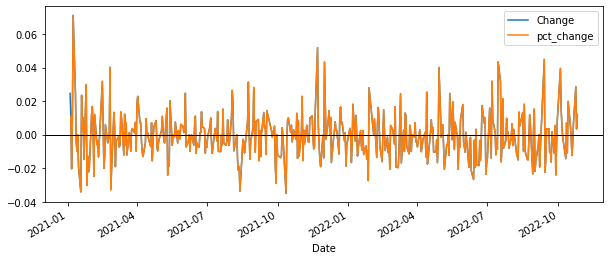

In [11]:
# "Change", "pct_change" 시각화 하기
import matplotlib.pyplot as plt

df_samsung[["Change", "pct_change"]].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

### 4-2. 이동평균

통계학에서 이동평균(=롤링평균)은 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는 계산이며,
이동산술평균(Moving Mean) 또는 롤링산술평균(Rolling Mean)이라고도 한다.

일련의 연속된 숫자와 고정된 부분 집합 크기가 주어지면, 이동 평균의 첫 번째 요소는 연속된 숫자의 첫 고정 부분 집합의 평균을 취하여 구한다. 그 다음, "앞으로 이동"하여 하위 집합을 변경한다. 즉, 부분 집합의 첫 번째 숫자를 제외하고 연속된 숫자의 다음 값을 포함시킨다.

### 4.2.1 rolling
### 4.2.2 expanding

In [12]:
df_samsung['avgFiveDay'] = df_samsung['Close'].rolling(window=5).mean()
df_samsung.head(5)

,Open,High,Low,Close,Volume,Change,Open_shift,Change_Close,Change2,pct_change,avgFiveDay
Date,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,NaN,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843,81000.0,900.0,0.010843,0.010843,NaN
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,81600.0,-1700.0,-0.020262,-0.020262,NaN
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83300.0,700.0,0.008516,0.008516,NaN
2021-01-08,83300,90000,83000,88800,59013307,0.071170,82800.0,5900.0,0.071170,0.071170,84160.0


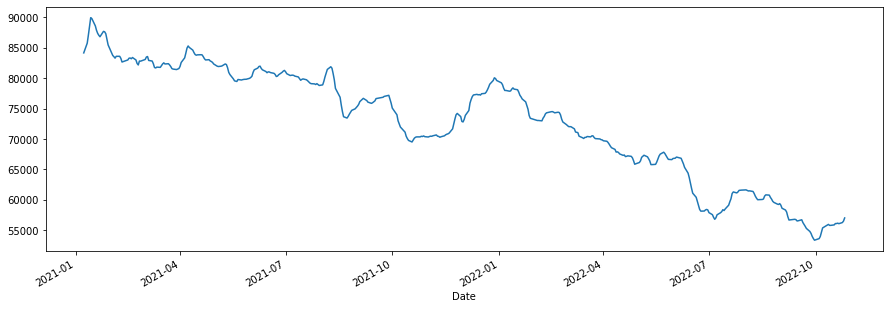

In [13]:
df_samsung['avgFiveDay'].plot(figsize=(15,5))
plt.show()

### 4.2.3 단순이동평균(SMA : Simple Moving Average)

In [15]:
# 7일, 14일 단순 이동평균 구하기
df_samsung["SMA7"] = df_samsung["Close"].rolling(7).mean()
df_samsung["SMA14"] = df_samsung["Close"].rolling(14).mean()

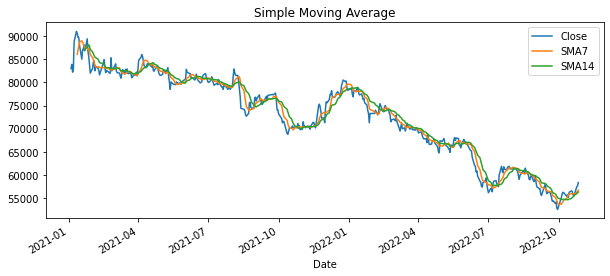

In [16]:
# 단순이동평균 시각화
df_samsung[["Close", "SMA7", "SMA14"]].plot(figsize=(10,4), title="Simple Moving Average")

### 4.2.4 누적이동평균(Cumulative Moving Average)

In [17]:
# expanding을 사용하면 window가 시간의 흐름에 따라 증가
df_samsung["CMA7"] = df_samsung["Close"].expanding(7).mean()

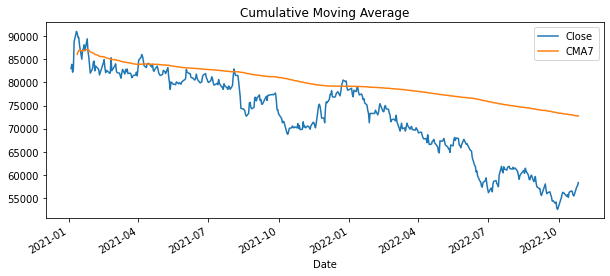

In [18]:
# 누적이동평균 시각화
df_samsung[["Close","CMA7"]].plot(figsize=(10,4), title="Cumulative Moving Average")

### 4.2.5 지수이동평균(Exponential Moving Average)
최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타낸다.

In [20]:
# 최근 자료에 가중치를 더 주도록 지수 이동평균을 구한다.
df_samsung["EWM_short"] = df_samsung["Close"].ewm(span=12).mean() # 12거래일로 span 지정
df_samsung["EWM_long"] = df_samsung["Close"].ewm(span=26).mean()
# MACD 지표 사용할 때 주로 활용된다.

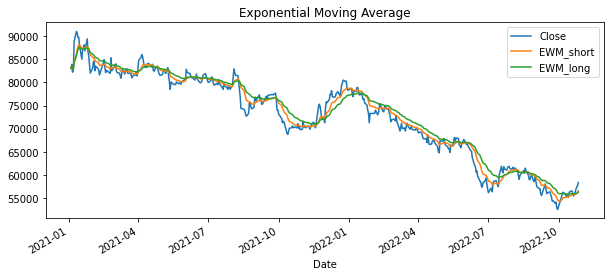

In [21]:
df_samsung[["Close","EWM_short","EWM_long"]].plot(figsize=(10,4), title="Exponential Moving Average")

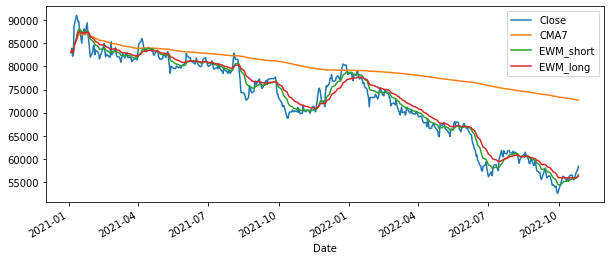

In [27]:
# 다양한 이동평균 비교하기
df_samsung[["Close", "CMA7", "EWM_short", "EWM_long"]].plot(figsize=(10,4))

### 4-3. resample

In [23]:
df_samsung = stock.get_market_ohlcv_by_date("20220101", "20221021", "005930")
mon = df_samsung.resample('W').first()
print(mon)

NameError: ignored

In [ ]:
month_first = df_samsung.resample('MS').first()
month_first.head()

# 파라미터 참고: https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html
# https://summerorange.tistory.com/entry/Resample-%EC%8B%9C%EA%B0%84%EB%8C%80-%EC%9B%94-%EB%85%84-%EC%9D%BC%EB%B3%84-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B0%92-%EA%B3%84%EC%82%B0 

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-01,79400,79800,78200,78600,13502112
2022-02-01,74900,74900,73300,73300,17744721
2022-03-01,72300,72400,71500,71700,12481430
2022-04-01,69500,69500,69000,69100,15916846
2022-05-01,66600,67600,66500,67300,14106184
